# Wine Dataset


This dataset is adapted from the Wine Data Set from https://archive.ics.uci.edu/ml/datasets/wine by removing the information about the types of wine for unsupervised learning.

The following descriptions are adapted from the UCI webpage:

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.



The attributes are:

Alcohol,
Malic acid,
Ash,
Alcalinity of ash,
Magnesium,
Total phenols,
Flavanoids,
Nonflavanoid phenols,
Proanthocyanins,
Color intensity,
Hue,
OD280/OD315 of diluted wines,
Proline

## Importing the libraries and dataset

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.options.display.float_format = "{:.2f}".format

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Importing the dataset
df = pd.read_csv('Wine_clustering.csv')

### Description of the dataset

In [3]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.60,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.20,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.60,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.80,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.00,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.shape

(178, 13)

In [5]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,13.00,2.34,2.37,19.49,99.74,2.30,2.03,0.36,1.59,5.06,0.96,2.61,746.89
std,0.81,1.12,0.27,3.34,14.28,0.63,1.00,0.12,0.57,2.32,0.23,0.71,314.91
min,11.03,0.74,1.36,10.60,70.00,0.98,0.34,0.13,0.41,1.28,0.48,1.27,278.00
25%,12.36,1.60,2.21,17.20,88.00,1.74,1.20,0.27,1.25,3.22,0.78,1.94,500.50
50%,13.05,1.87,2.36,19.50,98.00,2.35,2.13,0.34,1.56,4.69,0.96,2.78,673.50
75%,13.68,3.08,2.56,21.50,107.00,2.80,2.88,0.44,1.95,6.20,1.12,3.17,985.00
max,14.83,5.80,3.23,30.00,162.00,3.88,5.08,0.66,3.58,13.00,1.71,4.00,1680.00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
Alcohol                 178 non-null float64
Malic_Acid              178 non-null float64
Ash                     178 non-null float64
Ash_Alcanity            178 non-null float64
Magnesium               178 non-null int64
Total_Phenols           178 non-null float64
Flavanoids              178 non-null float64
Nonflavanoid_Phenols    178 non-null float64
Proanthocyanins         178 non-null float64
Color_Intensity         178 non-null float64
Hue                     178 non-null float64
OD280                   178 non-null float64
Proline                 178 non-null int64
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [7]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

#We gather that there is no object column all the columns in the dataset are integer/float type.
#Here we can see that there is/are no null values in the dataset.

# EDA

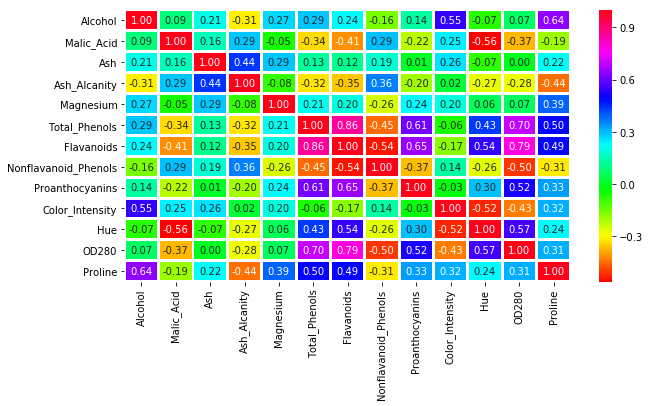

In [8]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='hsv',fmt='.2f',linewidths=2)
plt.show()

Plotting the histogram of each numerical variable (in this case, all features), the main idea here is to visualize the data distribution for each feature. This method can bring fast insights as:

*Check the kind of each feature distribution

*Check data symmetry

*Verify features frequency

*Identify outliers

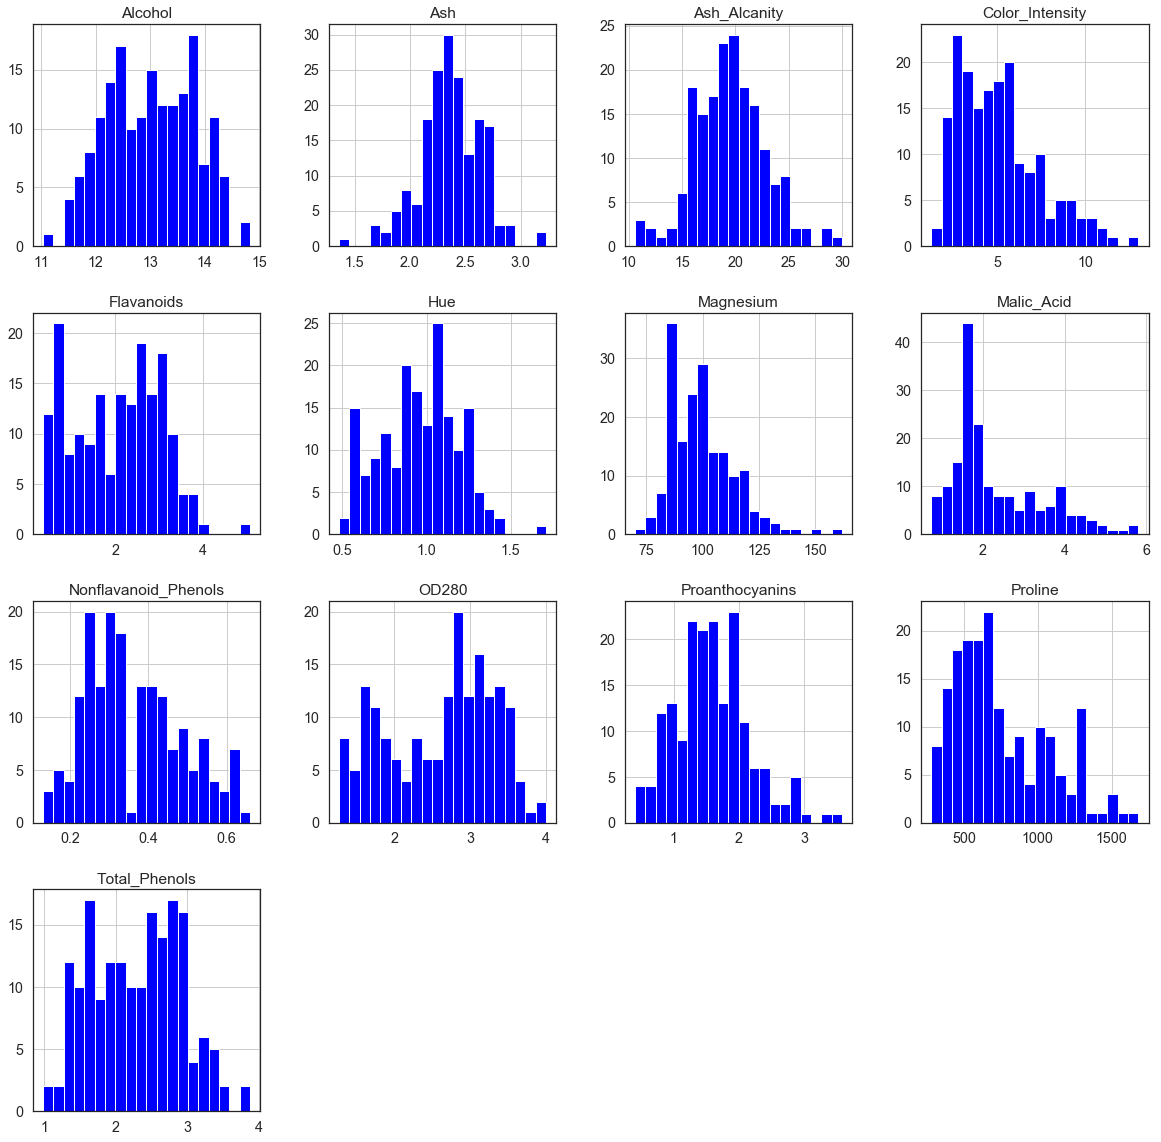

In [9]:
sns.set(style='white',font_scale=1.3, rc={'figure.figsize':(20,20)})
ax=df.hist(bins=20,color='blue' )

To reinforce our insights about the data symmetry and their outliers, we can da plot some boxplots.

1.5*IQR (IQR = Q3 - Q1)

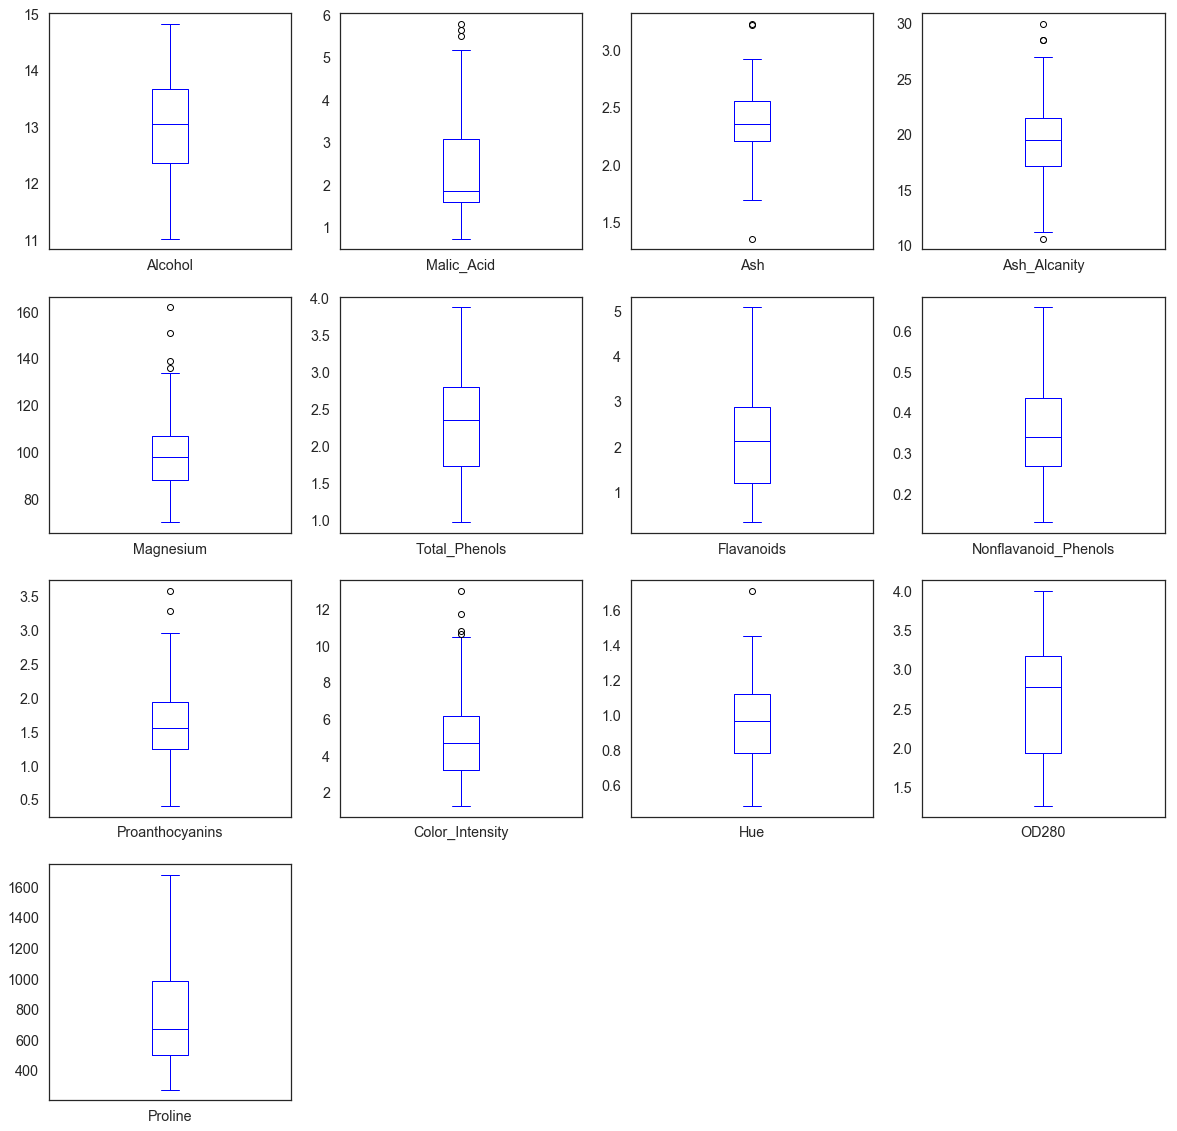

In [10]:
df.plot( kind = 'box', subplots = True, layout = (4,4), sharex = False, sharey = False,color='blue')
plt.show()

In [11]:

columns=["Malic_Acid", "Ash", "Ash_Alcanity", "Magnesium", "Proanthocyanins", "Color_Intensity", "Hue" ]
for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1    #IQR is interquartile range. 

    df = df.loc[(df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 *IQR)]

In [12]:
df.shape

(161, 13)

## Data preprocessing

We are going to use a K-means algorithm, as it uses the distance as the principal metric to alocate the data in your respective cluster we need to be careful with scale, because we can give more "relevance" to large scale features and despite the low scale ones.

To prevent that, we can use lot of Scaling methods, in this case i`m going to Satandardize the data: to have a 0 mean and unit variance

In [13]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
df_cluster=df.copy()
df_cluster[df_cluster.columns]=std_scaler.fit_transform(df_cluster)

C:\Users\Bhavya Kalra\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Bhavya Kalra\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [14]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,161.00,161.00,161.00,161.00,161.00,161.00,161.00,161.00,161.00,161.00,161.00,161.00,161.00
mean,13.03,2.32,2.36,19.30,98.59,2.28,2.03,0.36,1.54,5.03,0.96,2.62,753.82
std,0.79,1.05,0.24,2.97,12.40,0.63,0.98,0.12,0.51,2.16,0.22,0.71,317.82
min,11.41,0.74,1.70,11.20,70.00,0.98,0.34,0.13,0.41,1.28,0.54,1.27,278.00
25%,12.37,1.61,2.23,17.20,88.00,1.70,1.20,0.27,1.24,3.27,0.79,2.00,502.00
50%,13.07,1.86,2.36,19.00,98.00,2.32,2.13,0.34,1.48,4.80,0.96,2.78,675.00
75%,13.69,3.10,2.54,21.00,106.00,2.80,2.90,0.43,1.87,6.20,1.12,3.18,1020.00
max,14.83,5.19,2.92,27.00,134.00,3.88,3.93,0.66,2.91,10.68,1.45,4.00,1680.00


# Clustering

# KMeans Clustering

In [22]:
x=df.iloc[:, :-1].values

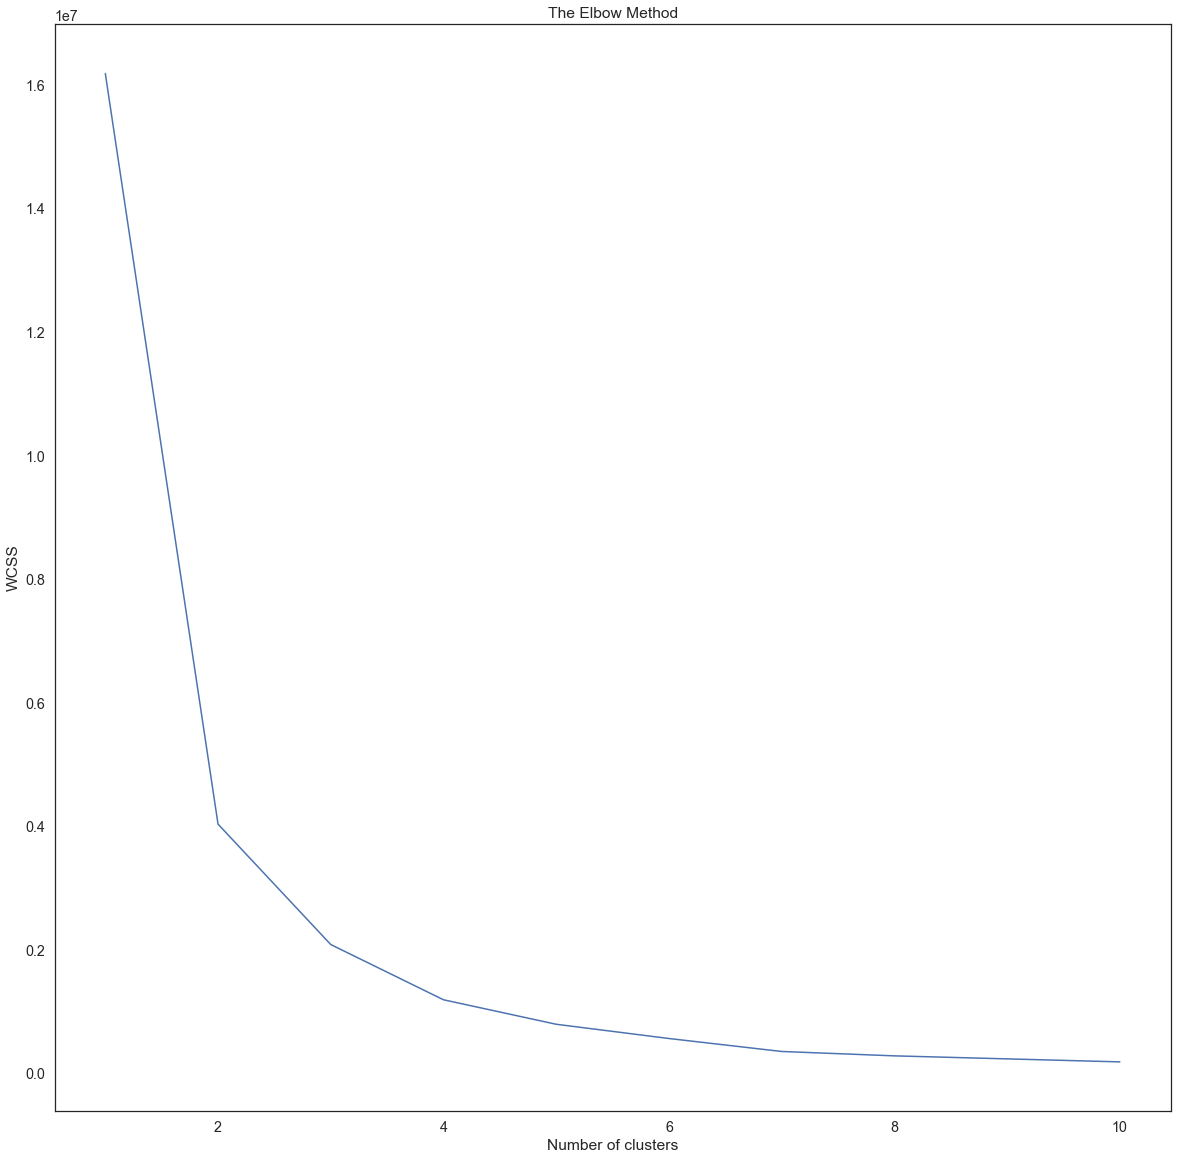

In [23]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter=300, n_init=10)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [24]:

kmeans=KMeans(n_clusters=2)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [25]:
labels = kmeans.labels_
df["cluster"]=labels


In [26]:
labels

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1])

##Using K-means, grouping the data with the help of two attributes "Alcohol" and "Total_Phenols"

In [27]:
x = df.iloc[:, [0, 5]].values


print(x.shape)

(161, 2)


We are using the K-means algorithm, to choose K (number of clusters) using K-means wcss (with Elbow analysis)
First, we will compute all wcss. Basically, the lower the wcss the better the clustering

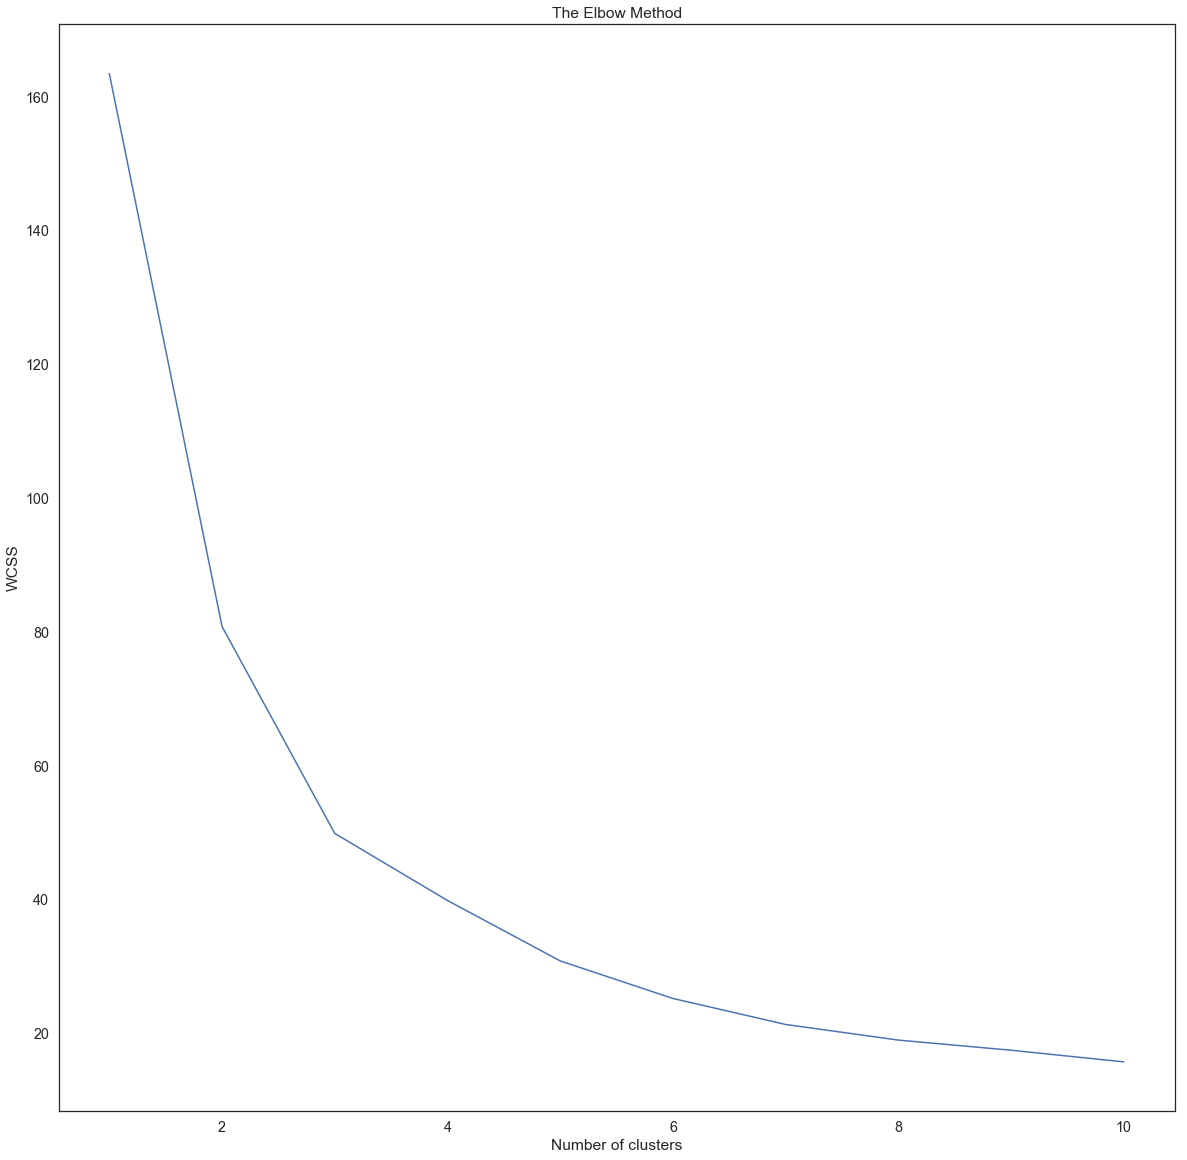

In [28]:
# Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter=300, n_init=10)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

As we can see, in K=3 the metrics indicates that it is the best clusters number. So, we'll be using it

In [29]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter=300, n_init=10)
y_means = kmeans.fit_predict(x)
print (y_means)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 2
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 0 1 0 2 0 2 1 1 2 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1
 1 1 1 1 1 1 1 2 2 2 2 1 2 1 2 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2
 2 2 2 2 2 2 1 2 2 2 2 2 0]


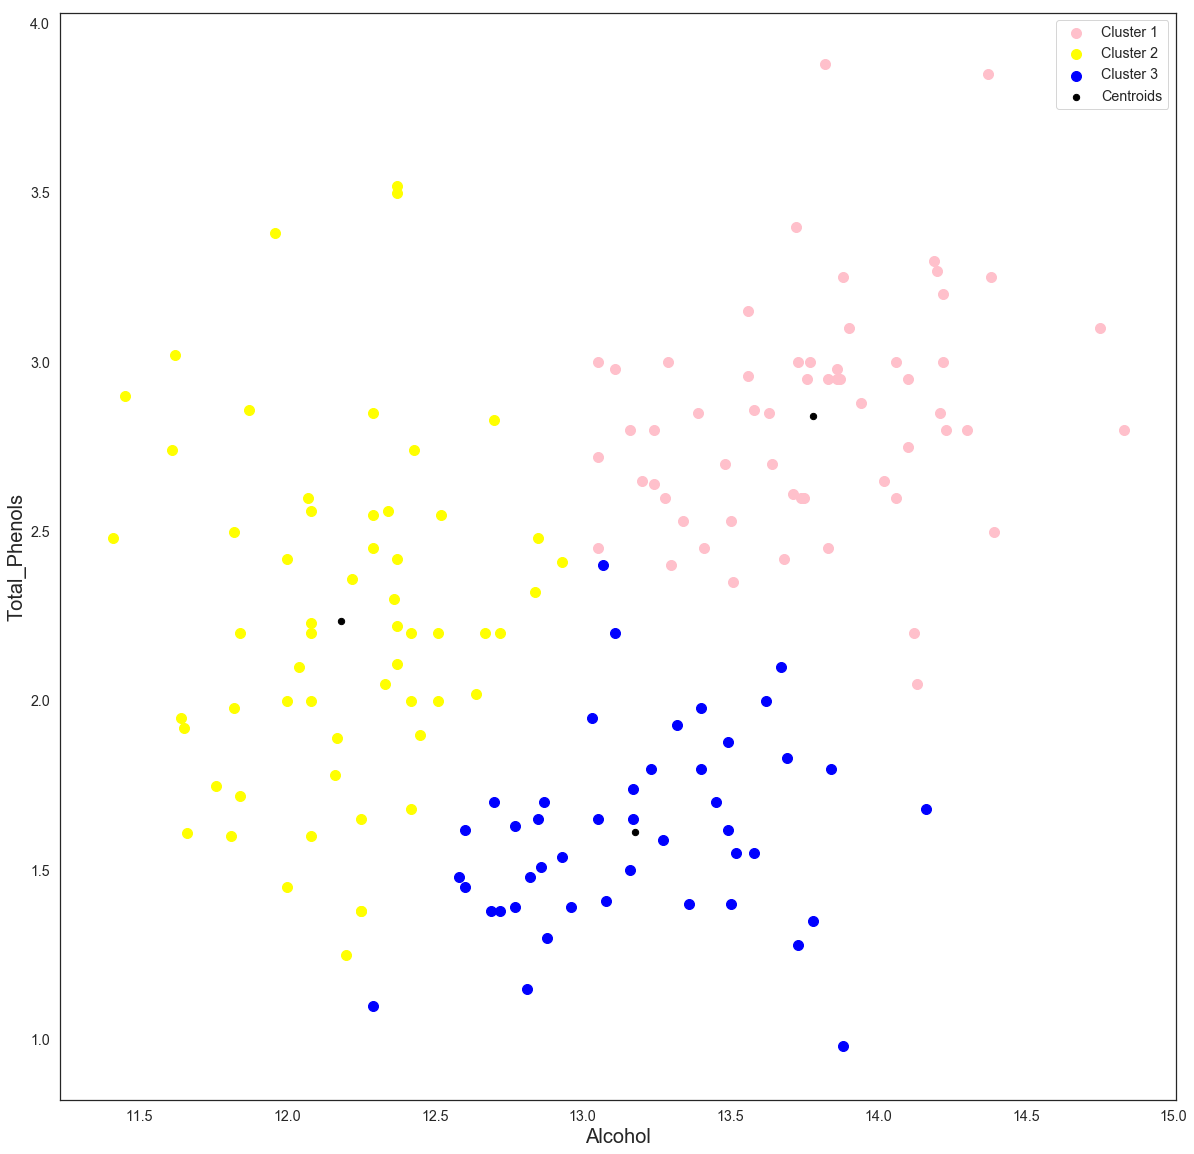

In [30]:
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Cluster 1')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'Cluster 2')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'blue', label = 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 40, c = 'black', label = 'Centroids')
plt.legend()
plt.xlabel('Alcohol', fontsize = 20) 
plt.ylabel('Total_Phenols',fontsize=20)
plt.show()

In [31]:
centroids = kmeans.cluster_centers_

pd.Series(y_means).value_counts()

1    58
0    58
2    45
dtype: int64

Here, we can visualize each feature distribution according to each cluster, in this step we can define some characteristics for each group

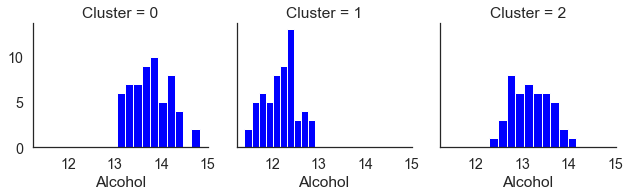

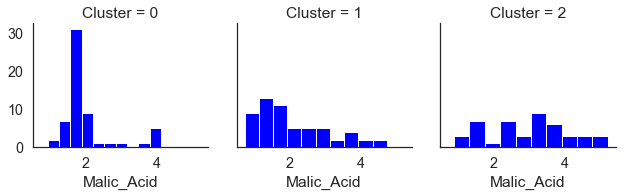

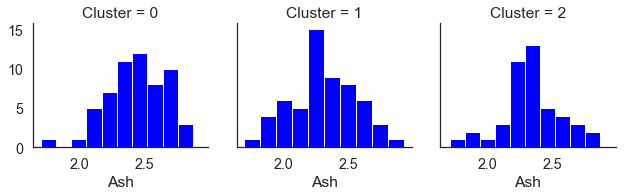

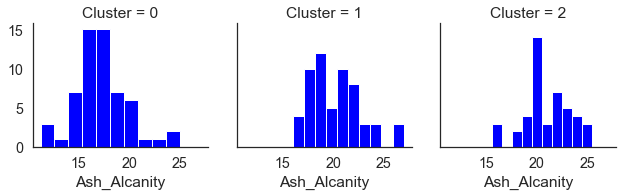

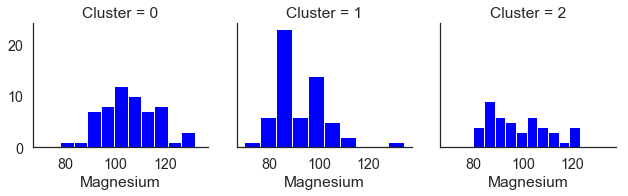

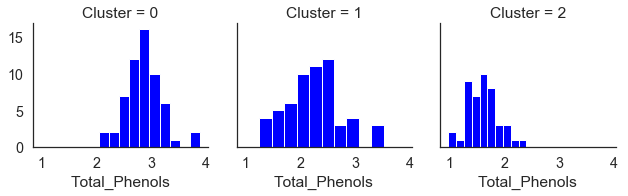

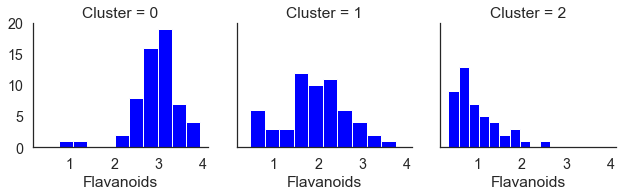

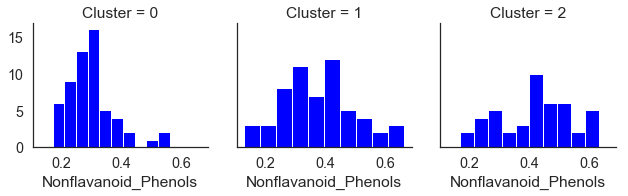

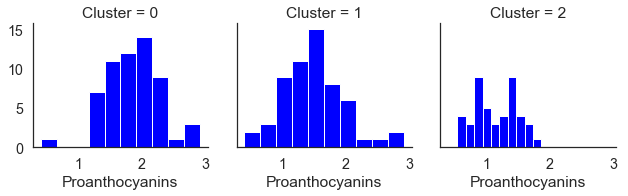

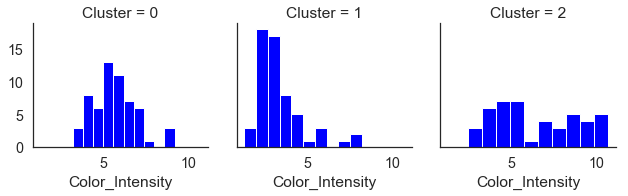

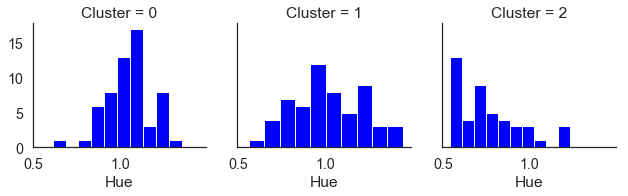

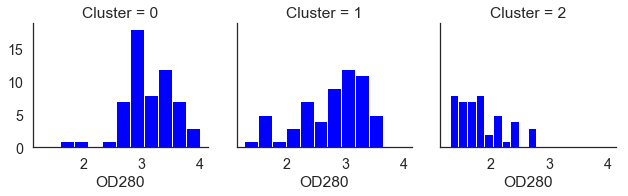

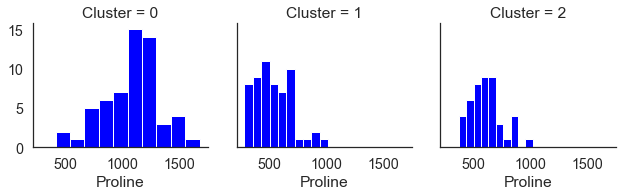

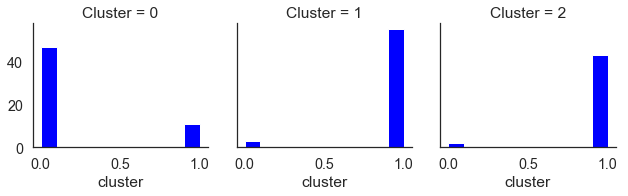

In [32]:
df2=df.copy()
df2['Cluster']=y_means

aux=df2.columns.tolist()
aux[0:len(aux)-1]

for cluster in aux[0:len(aux)-1]:
    grid= sns.FacetGrid(df2, col='Cluster')
    grid.map(plt.hist, cluster,color='blue')

# Hierarchical Clustering 

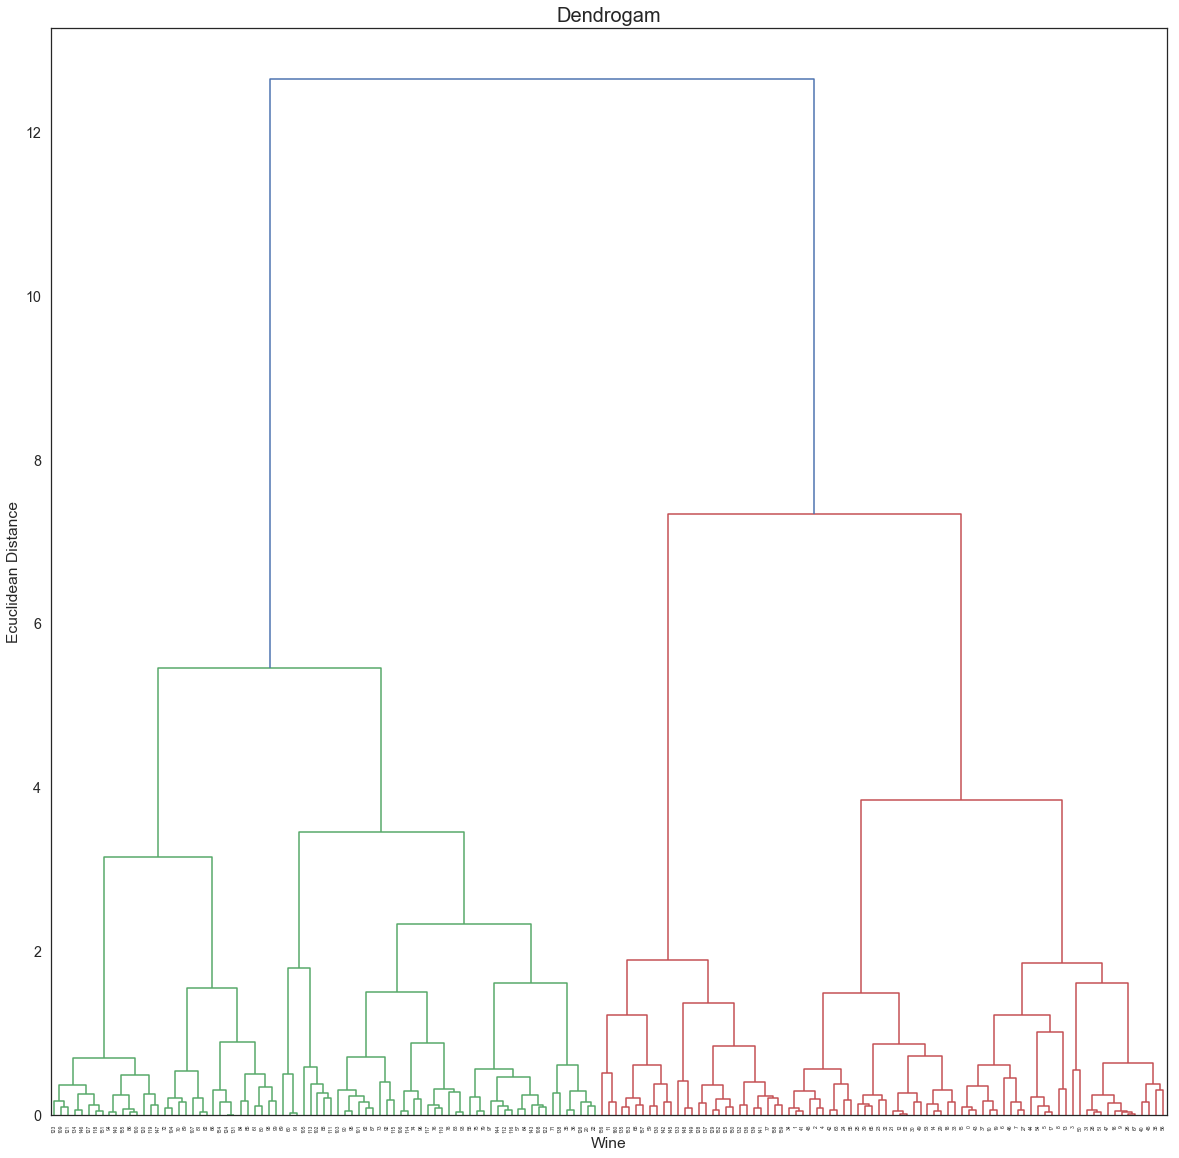

In [33]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Wine')
plt.ylabel('Ecuclidean Distance')
plt.show()

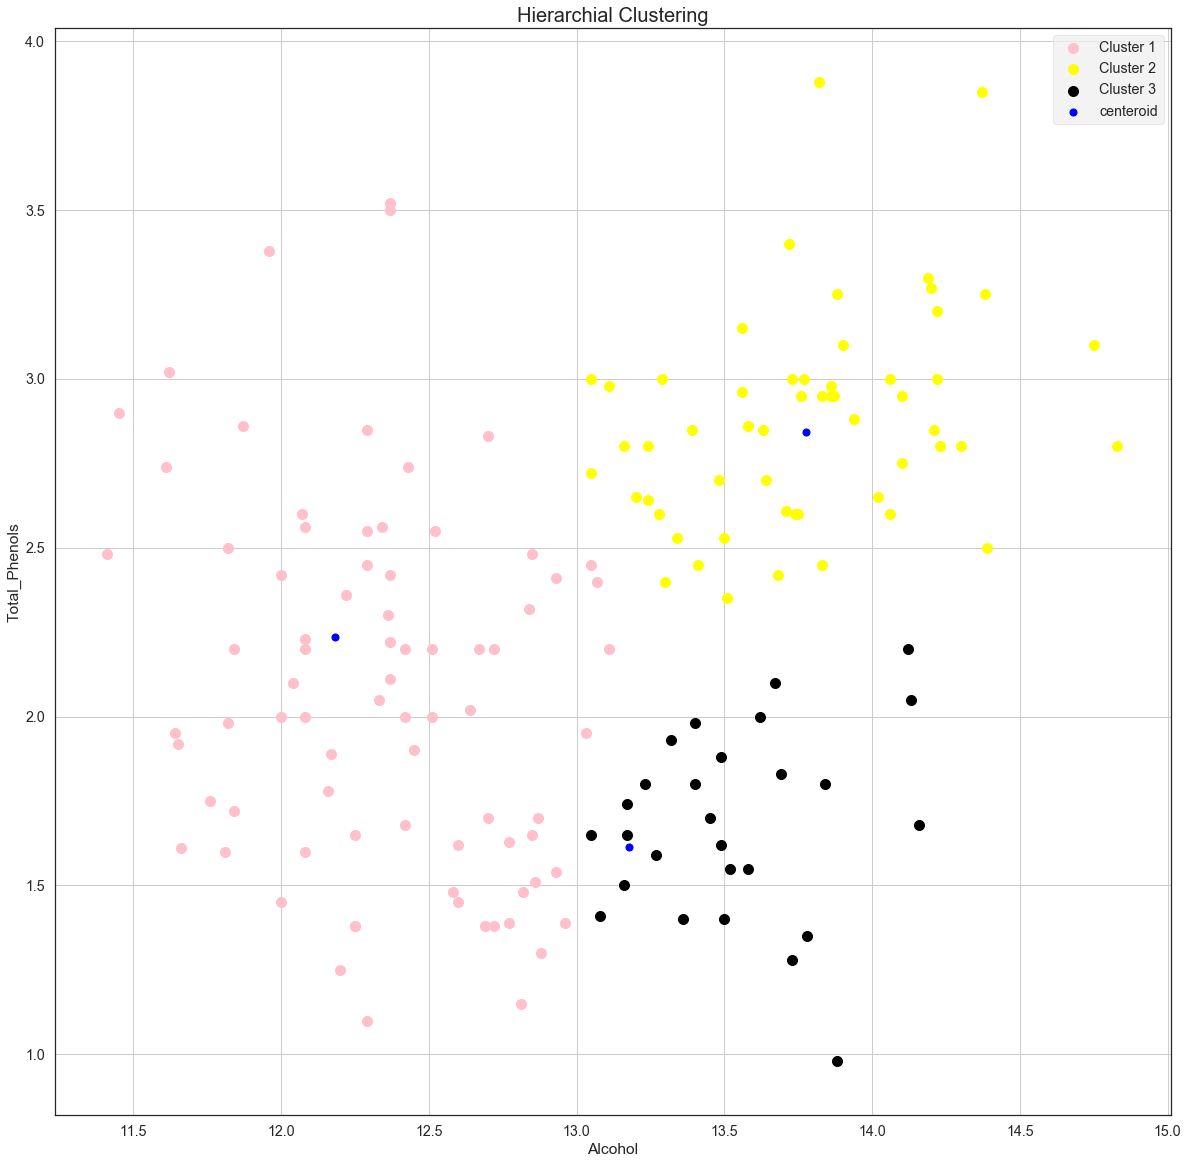

In [34]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = 'pink', label = 'Cluster 1')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'yellow', label = 'Cluster 2')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c = 'black', label = 'Cluster 3')


plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('Hierarchial Clustering', fontsize = 20)
plt.ylabel('Total_Phenols')
plt.xlabel('Alcohol')
plt.legend()
plt.grid()
plt.show()

#  Finding the Optimal Number of Clusters

## Silhouette score

In [35]:
from sklearn.metrics import silhouette_score

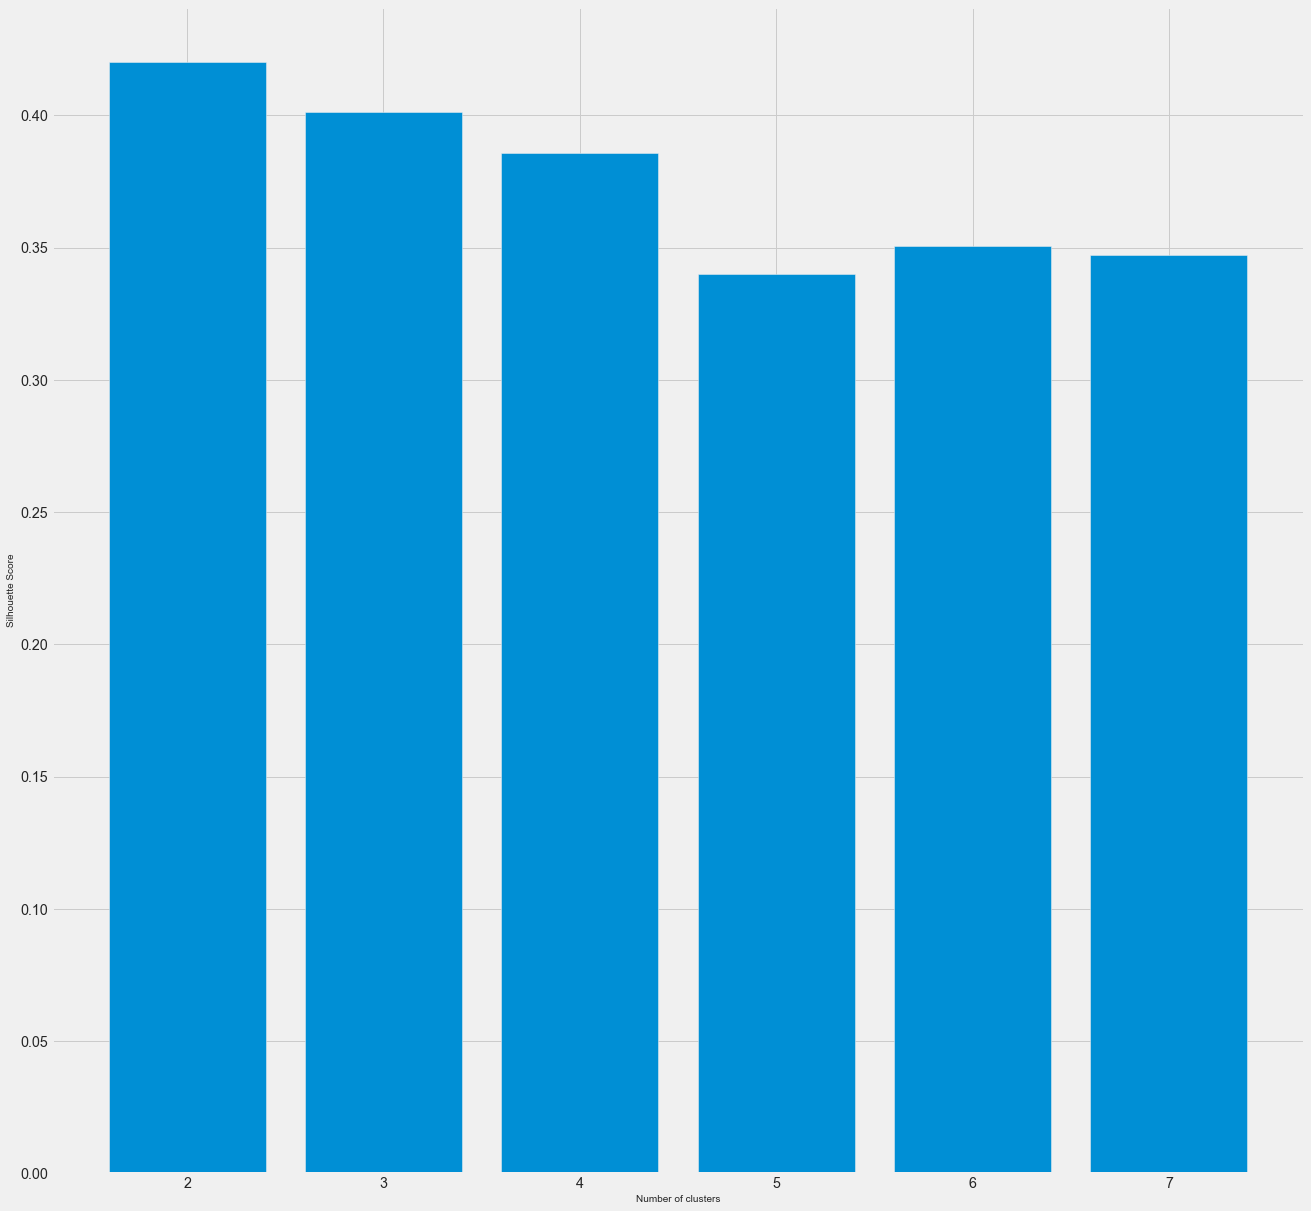

In [36]:
silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(x, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(x))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

A higher Silhouette Coefficient indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.Here no. of cluster=2 value is the highest.

In [37]:
silhouette_score(x, AgglomerativeClustering(n_clusters = 2).fit_predict(x))

0.4199851898258016

## Davies Bouldin score

In [38]:
from sklearn.metrics import davies_bouldin_score

C:\Users\Bhavya Kalra\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\Bhavya Kalra\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\Bhavya Kalra\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\Bhavya Kalra\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\Bhavya Kalra\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divid

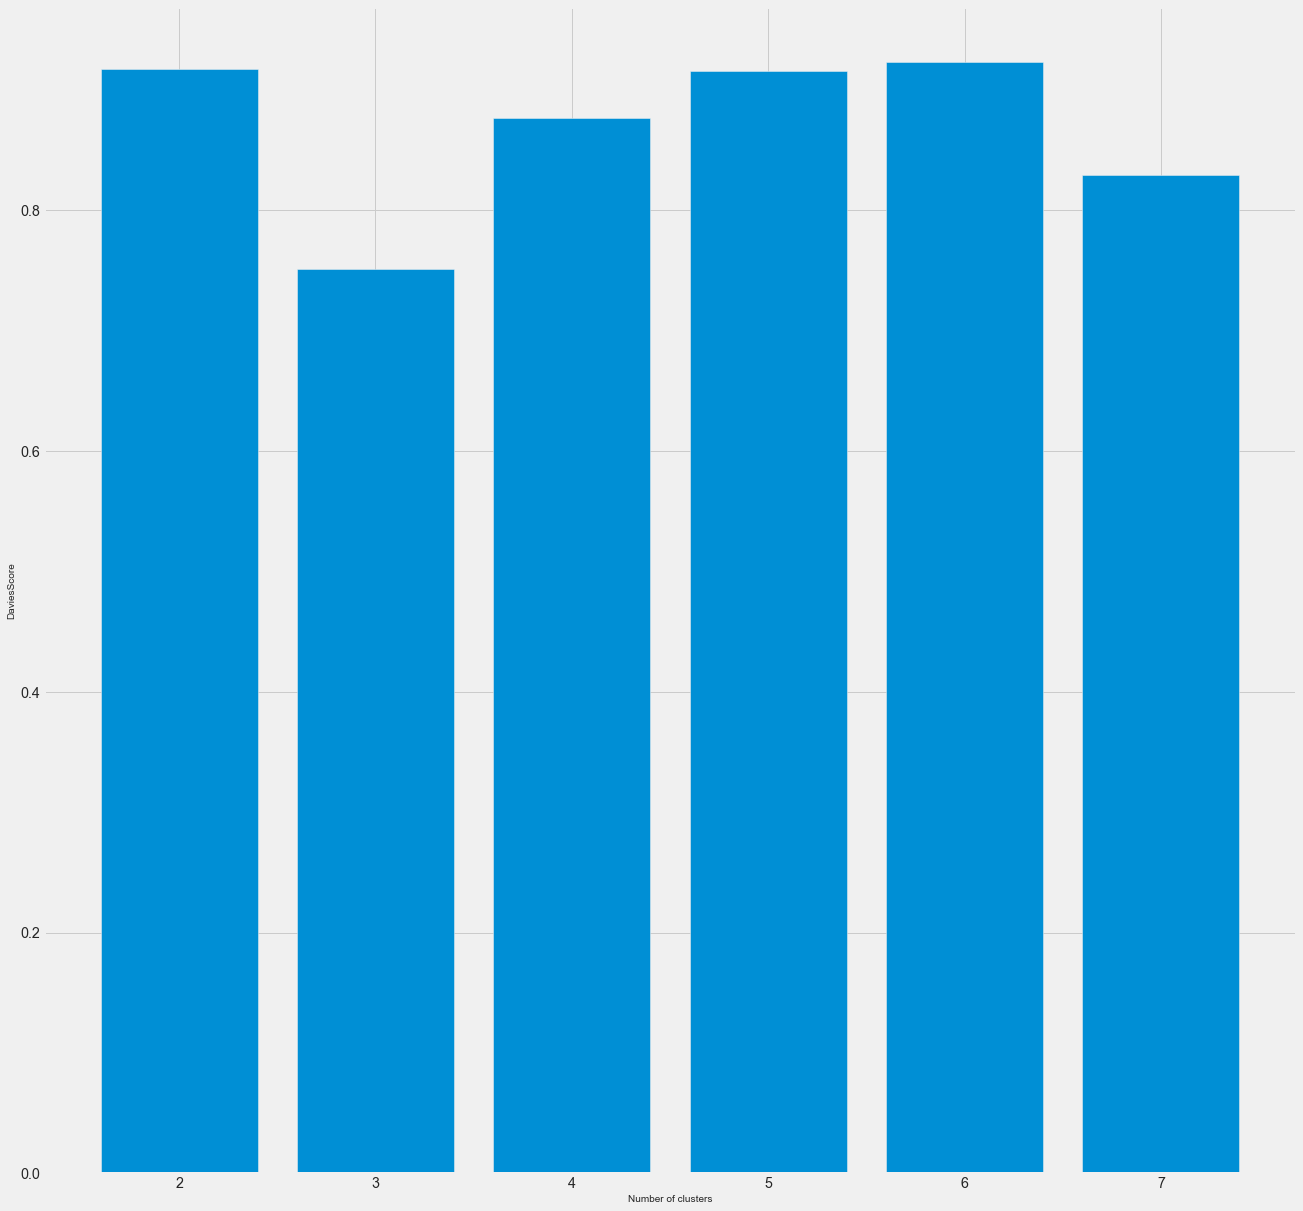

In [39]:
davies_score = [] 

for n_cluster in range(2, 8):
    davies_score.append( 
        davies_bouldin_score(x, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(x))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, davies_score) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('DaviesScore', fontsize = 10) 
plt.show() 

Lower values of davies, indicates better clustering. so we choose no of cluster=3

In [40]:
davies_bouldin_score(x, AgglomerativeClustering(n_clusters = 3).fit_predict(x))

C:\Users\Bhavya Kalra\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


0.7514295707779297

## For KMeans

C:\Users\Bhavya Kalra\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\Bhavya Kalra\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\Bhavya Kalra\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\Bhavya Kalra\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\Bhavya Kalra\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divid

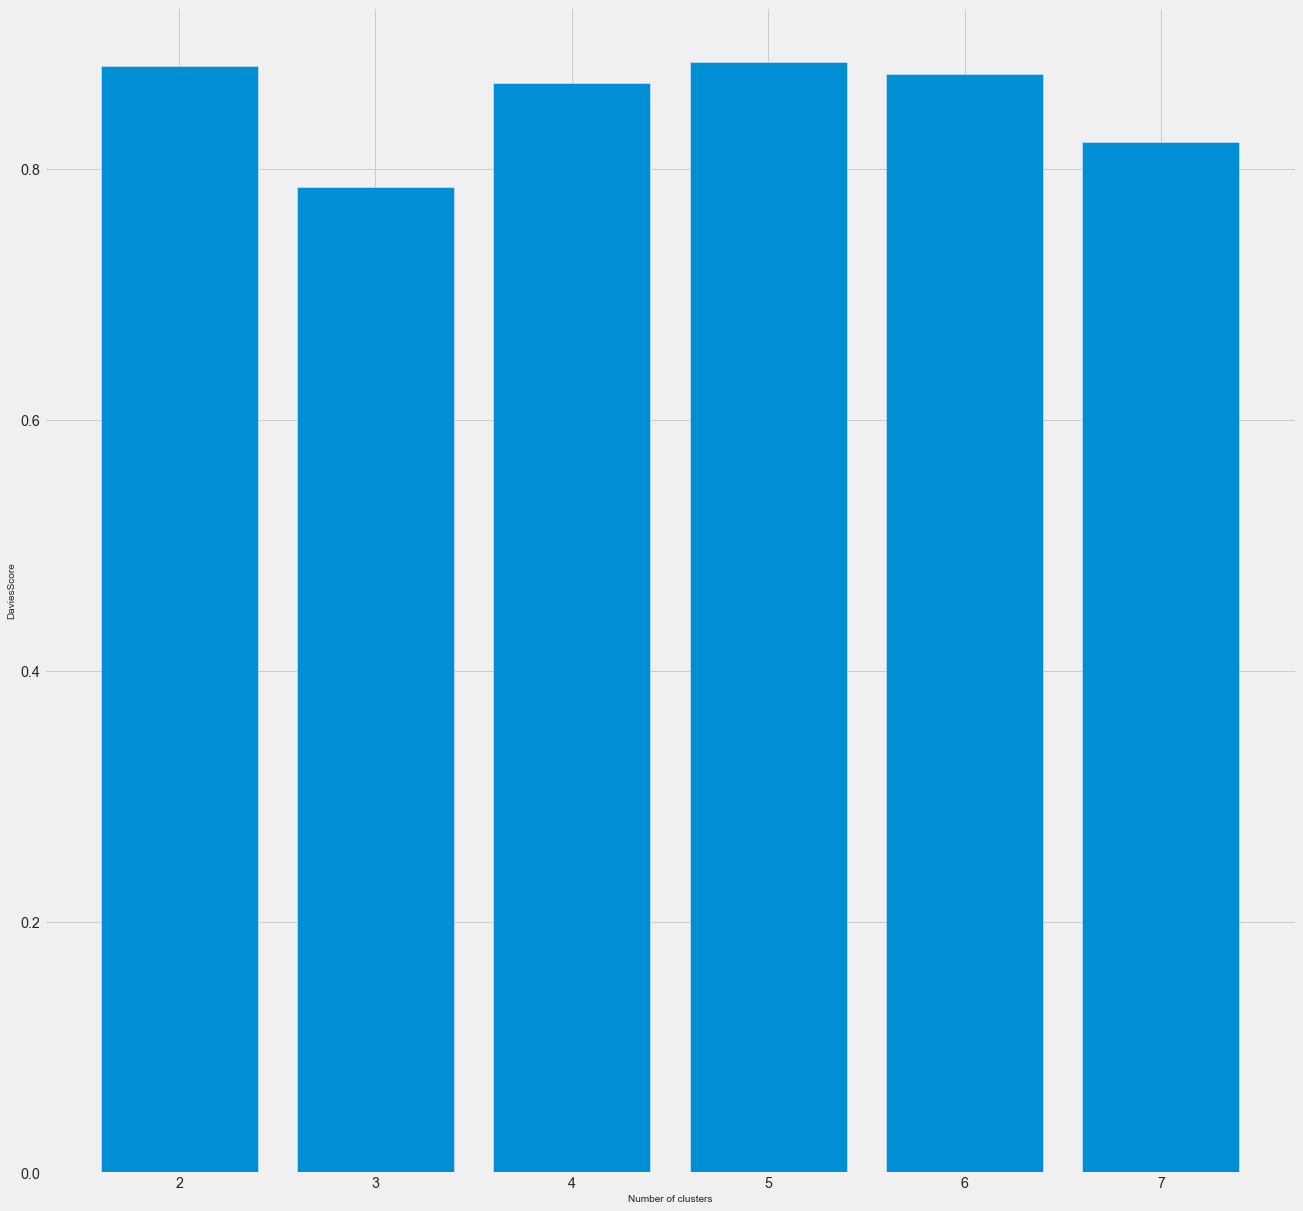

In [41]:
davies_score = [] 

for n_cluster in range(2, 8):
    davies_score.append( 
        davies_bouldin_score(x, KMeans(n_clusters = n_cluster).fit_predict(x))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, davies_score) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('DaviesScore', fontsize = 10) 
plt.show() 

In [42]:
davies_bouldin_score(x, KMeans(n_clusters = 3).fit_predict(x))

C:\Users\Bhavya Kalra\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


0.785828121515888

Lower values of davies, indicates better clustering. so we choose no of cluster=3

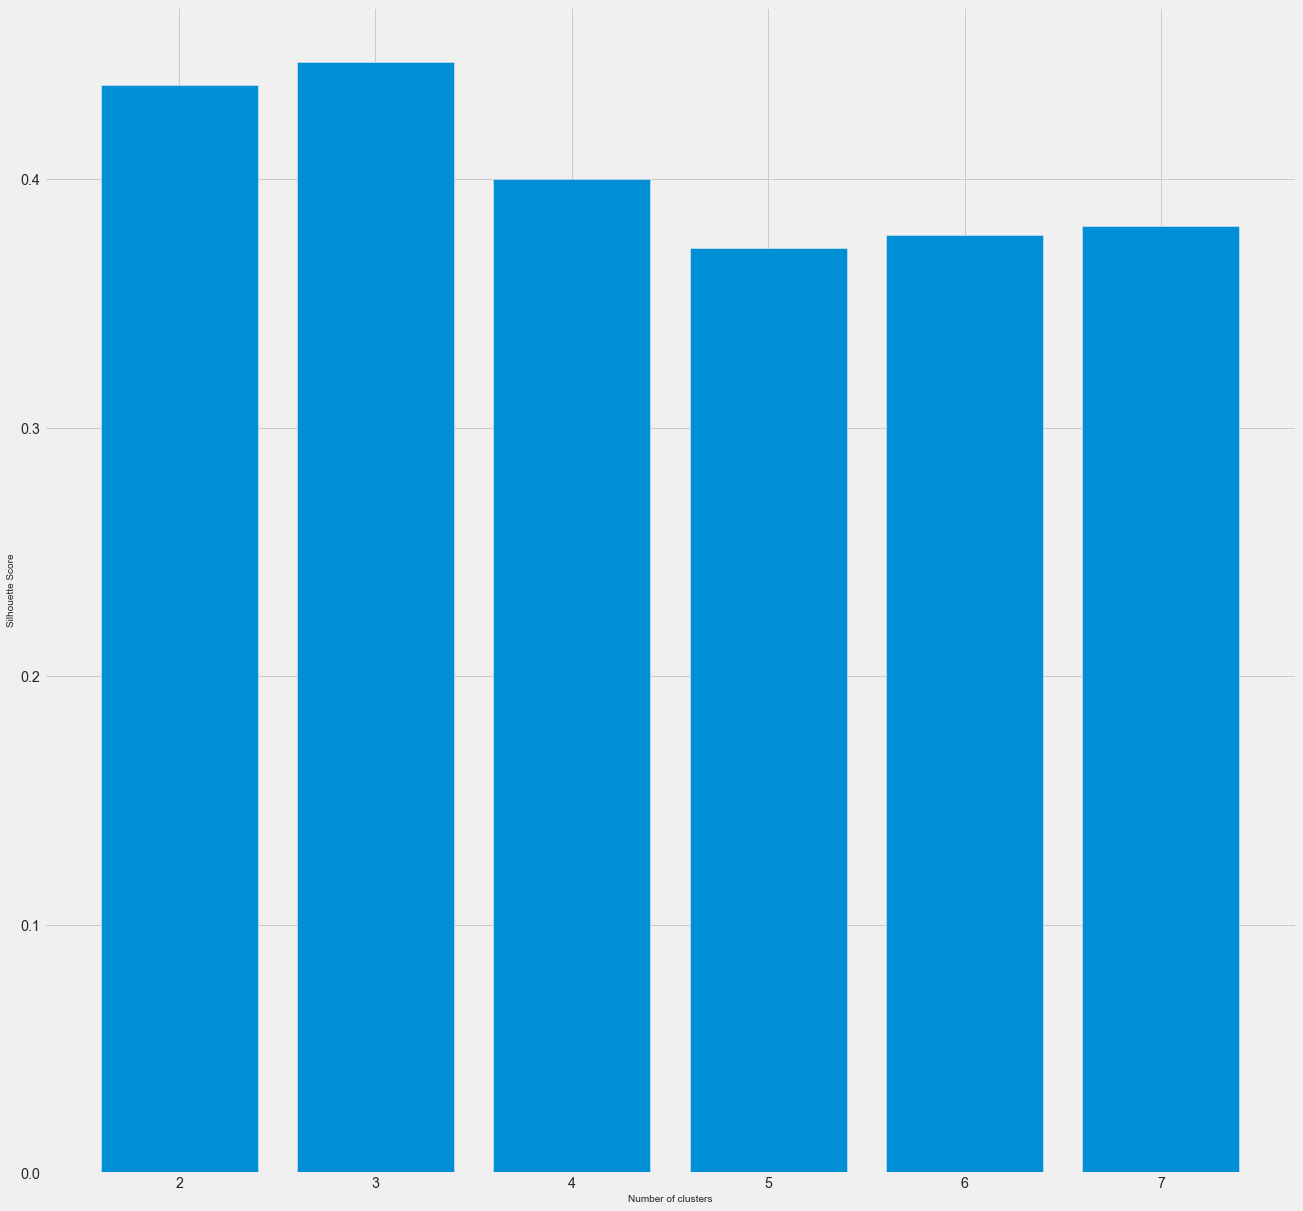

In [43]:
silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(x, KMeans(n_clusters = n_cluster).fit_predict(x))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

A higher Silhouette Coefficient indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.Here no. of cluster=3 value is the highest.

In [44]:
silhouette_score(x, KMeans(n_clusters = 3).fit_predict(x))

0.44696642912300755

# Dunn Index

In [53]:
x = df.iloc[:, [0, 5]].values


In [54]:
from sklearn import cluster 
k_means = cluster.KMeans(n_clusters=3) 
k_means.fit(x) #K-means training 
y_pred = k_means.predict(x) 

In [55]:
pred = pd.DataFrame(y_pred) 
pred.columns = ['Type'] 

In [56]:
prediction = pd.concat([df, pred], axis = 1)

In [57]:
centroids = kmeans.cluster_centers_

pd.Series(y_means).value_counts()

1    58
0    58
2    45
dtype: int64

In [68]:
p = pd.Series(y_means).value_counts()

p

1    58
0    58
2    45
dtype: int64